# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 5
shufflePixels = False
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(25000, 32, 32, 3)
(25000, 5)
(5000, 32, 32, 3)
(5000, 5)


Populating the interactive namespace from numpy and matplotlib


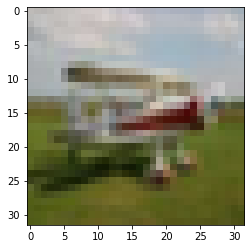

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

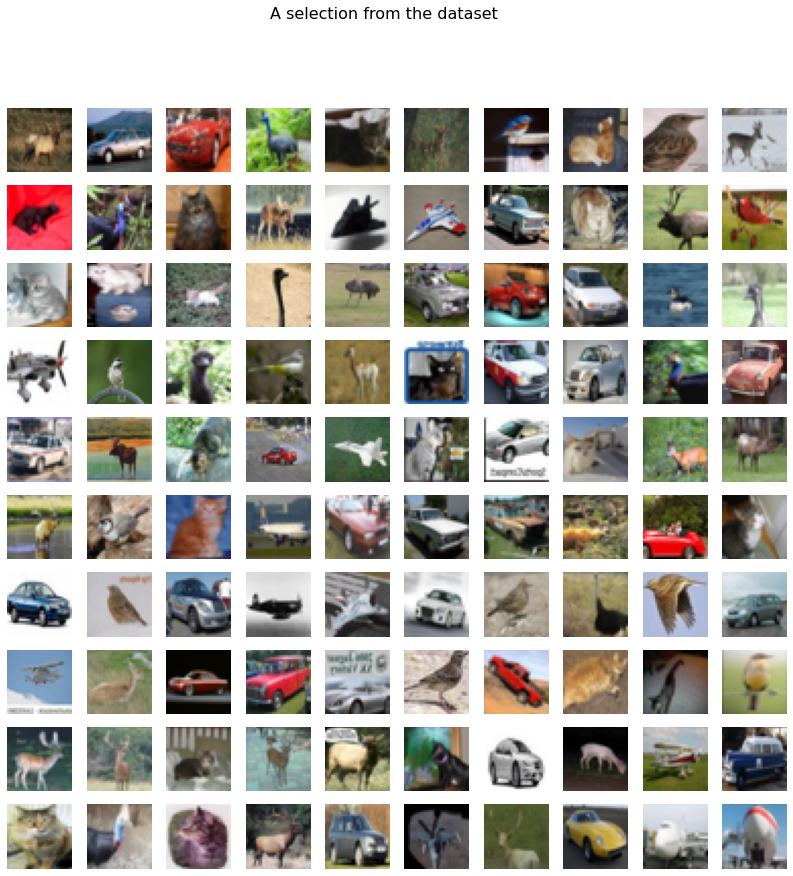

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 12s 51ms/step - loss: 1.6075 - accuracy: 0.2000
test loss, test acc: [1.6075314283370972, 0.20000000298023224]
Evaluate on test data
10/10 [==============================] - 1s 137ms/step - loss: 1.6073 - accuracy: 0.2000
test loss, test acc: [1.6073107719421387, 0.20000000298023224]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 9s 30ms/step - loss: 1.4984 - accuracy: 0.3376 - val_loss: 1.4086 - val_accuracy: 0.3736
Epoch 2/250
250/250 [==============================] - 7s 30ms/step - loss: 1.2662 - accuracy: 0.4761 - val_loss: 1.3504 - val_accuracy: 0.4442
Epoch 3/250
250/250 [==============================] - 7s 29ms/step - loss: 1.0840 - accuracy: 0.5657 - val_loss: 1.1785 - val_accuracy: 0.5458
Epoch 4/250
250/250 [==============================] - 7s 29ms/step - loss: 0.9593 - accuracy: 0.6175 - val_loss: 0.9279 - val_accuracy: 0.6216
Epoch 5/250
250/250 [==============================] - 7s 29ms/step - loss: 0.8824 - accuracy: 0.6551 - val_loss: 0.9054 - val_accuracy: 0.6600
Epoch 6/250
250/250 [==============================] - 7s 29ms/step - loss: 0.7986 - accuracy: 0.6893 - val_loss: 0.7692 - val_accuracy: 0.7106
Epoch 7/250
250/250 [==============================] - 7s 30ms/step - loss: 0.7455 - accuracy: 0.7138 - val_loss: 0.7995 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 1s 29ms/step - loss: 8.9909e-07 - accuracy: 1.0000
test loss, test acc: [8.990909350359289e-07, 1.0]
Evaluate on test data
10/10 [==============================] - 0s 28ms/step - loss: 2.0694 - accuracy: 0.8102
test loss, test acc: [2.0694351196289062, 0.8101999759674072]


# Small

In [12]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 1s 8ms/step - loss: 68.1199 - accuracy: 0.2001
test loss, test acc: [68.119873046875, 0.200080007314682]
Evaluate on test data
10/10 [==============================] - 0s 17ms/step - loss: 68.5012 - accuracy: 0.2002
test loss, test acc: [68.50115966796875, 0.20020000636577606]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 3s 7ms/step - loss: 6.8196 - accuracy: 0.2977 - val_loss: 1.2466 - val_accuracy: 0.5138
Epoch 2/250
250/250 [==============================] - 2s 7ms/step - loss: 1.2328 - accuracy: 0.4829 - val_loss: 1.0371 - val_accuracy: 0.5848
Epoch 3/250
250/250 [==============================] - 2s 7ms/step - loss: 1.0969 - accuracy: 0.5517 - val_loss: 0.9997 - val_accuracy: 0.6056
Epoch 4/250
250/250 [==============================] - 2s 7ms/step - loss: 1.0156 - accuracy: 0.5898 - val_loss: 0.9255 - val_accuracy: 0.6380
Epoch 5/250
250/250 [==============================] - 2s 7ms/step - loss: 0.9599 - accuracy: 0.6176 - val_loss: 0.8889 - val_accuracy: 0.6558
Epoch 6/250
250/250 [==============================] - 2s 7ms/step - loss: 0.9132 - accuracy: 0.6393 - val_loss: 0.8550 - val_accuracy: 0.6672
Epoch 7/250
250/250 [==============================] - 2s 7ms/step - loss: 0.8787 - accuracy: 0.6555 - val_loss: 0.8299 - val_accuracy: 0.6718

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

#tNet

In [ ]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [ ]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 12s 41ms/step - loss: 1.2537 - accuracy: 0.4997 - val_loss: 1.0923 - val_accuracy: 0.5762
Epoch 2/250
250/250 [==============================] - 10s 39ms/step - loss: 0.9570 - accuracy: 0.6203 - val_loss: 0.9310 - val_accuracy: 0.6278
Epoch 3/250
250/250 [==============================] - 10s 39ms/step - loss: 0.8304 - accuracy: 0.6768 - val_loss: 0.8588 - val_accuracy: 0.6574
Epoch 4/250
250/250 [==============================] - 10s 39ms/step - loss: 0.7193 - accuracy: 0.7212 - val_loss: 0.8381 - val_accuracy: 0.6818
Epoch 5/250
250/250 [==============================] - 10s 39ms/step - loss: 0.6128 - accuracy: 0.7670 - val_loss: 0.8241 - val_accuracy: 0.6898
Epoch 6/250
250/250 [==============================] - 10s 39ms/step - loss: 0.5188 - accuracy: 0.8104 - val_loss: 0.8492 - val_accuracy: 0.6936
Epoch 7/250
250/250 [==============================] - 10s 39ms/step - loss: 0.4252 - accuracy: 0.8514 - val_loss: 0.9104 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

# ConvNet

In [28]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [29]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [30]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 3s 46ms/step - loss: 4.8914 - accuracy: 0.2066
test loss, test acc: [4.891412258148193, 0.20664000511169434]
Evaluate on test data
10/10 [==============================] - 0s 45ms/step - loss: 4.9280 - accuracy: 0.2056
test loss, test acc: [4.927980899810791, 0.20559999346733093]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 11s 39ms/step - loss: 1.1001 - accuracy: 0.5470 - val_loss: 1.0220 - val_accuracy: 0.5570
Epoch 2/250
250/250 [==============================] - 10s 38ms/step - loss: 0.8737 - accuracy: 0.6472 - val_loss: 0.8170 - val_accuracy: 0.6680
Epoch 3/250
250/250 [==============================] - 9s 38ms/step - loss: 0.7708 - accuracy: 0.6927 - val_loss: 0.7977 - val_accuracy: 0.6864
Epoch 4/250
250/250 [==============================] - 9s 38ms/step - loss: 0.6891 - accuracy: 0.7300 - val_loss: 0.6925 - val_accuracy: 0.7276
Epoch 5/250
250/250 [==============================] - 9s 38ms/step - loss: 0.6304 - accuracy: 0.7560 - val_loss: 0.6828 - val_accuracy: 0.7448
Epoch 6/250
250/250 [==============================] - 10s 38ms/step - loss: 0.5729 - accuracy: 0.7801 - val_loss: 0.6128 - val_accuracy: 0.7666
Epoch 7/250
250/250 [==============================] - 10s 38ms/step - loss: 0.5294 - accuracy: 0.7968 - val_loss: 0.5625 - val_accur

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 45ms/step - loss: 6.6986e-05 - accuracy: 1.0000
test loss, test acc: [6.698555807815865e-05, 1.0]
Evaluate on test data
10/10 [==============================] - 0s 44ms/step - loss: 1.0097 - accuracy: 0.8684
test loss, test acc: [1.009690523147583, 0.868399977684021]


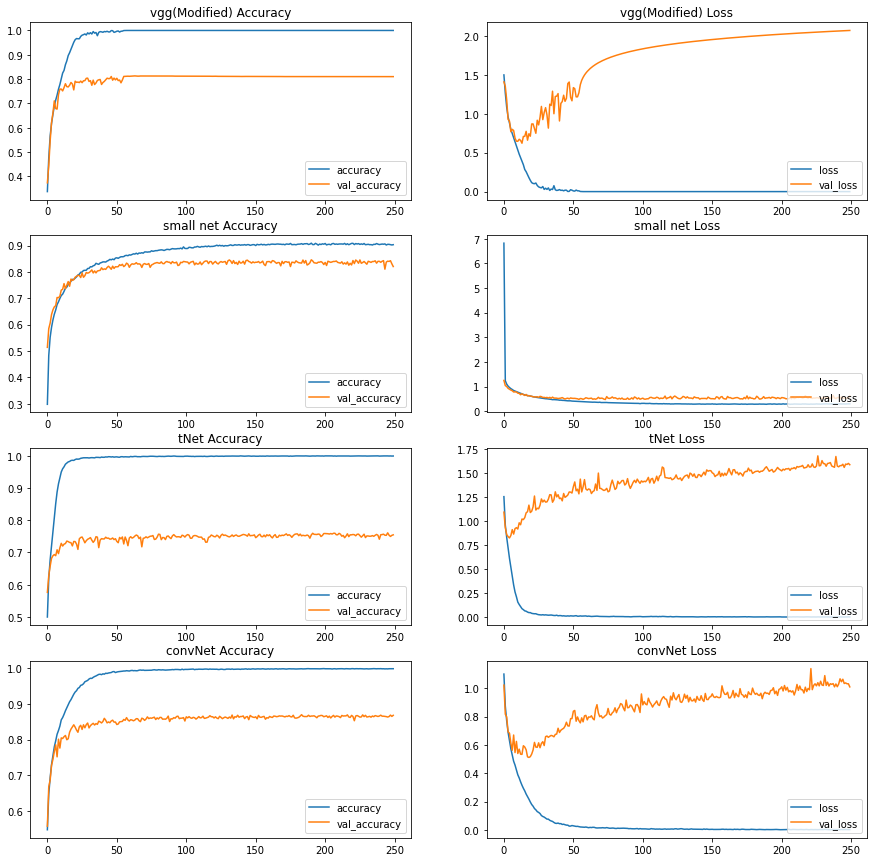

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1